In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow import keras

# Importing Deep Learning Libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array

from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [2]:
picture_size = 48
folder_path = "C:/Users/alame/Desktop/mfer2013/archive (20)/fer2013plus/fer2013/"
train_dir ="C:/Users/alame/Desktop/mfer2013/archive (20)/fer2013plus/fer2013/train/"
test_dir = "C:/Users/alame/Desktop/mfer2013/archive (20)/fer2013plus/fer2013/test/"


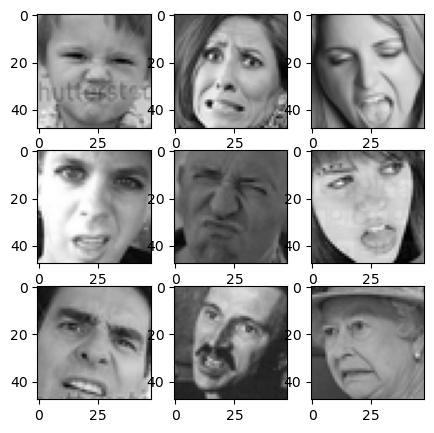

In [4]:
expression = 'disgust'

plt.figure(figsize= (5,5))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

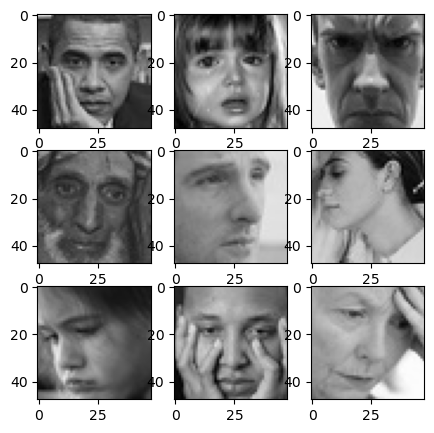

In [5]:
expression = 'sad'

plt.figure(figsize= (5,5))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

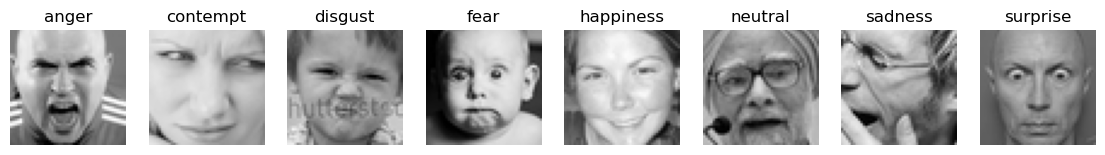

In [5]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,8,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [3]:
for expression in os.listdir(folder_path + "train"):
    print(str(len(os.listdir(folder_path+ "train/" + expression))) + " " + expression + " images")

2466 anger images
165 contempt images
191 disgust images
652 fear images
7528 happiness images
10308 neutral images
3514 sadness images
3562 surprise images


In [5]:
batch_size  = 64
#used Keras' ImageDataGenerator to create training and testing data generators for grayscale images with categorical labels,
#specified batch size, and shuffling for the specified directories.datagen_train  = ImageDataGenerator()
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28386 images belonging to 8 classes.
Found 7099 images belonging to 8 classes.


In [17]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 8

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(256,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_19 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_19 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 128)      

In [18]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [19]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                 )

Epoch 1/20


C:\Users\alame\AppData\Local\Temp\ipykernel_13600\21092760.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


443/443 [==============================] - ETA: 0s - loss: 1.4274 - accuracy: 0.4993WARNING:tensorflow:Can save best model only with val_acc available, skipping.


443/443 [==============================] - 359s 807ms/step - loss: 1.4274 - accuracy: 0.4993 - val_loss: 1.6811 - val_accuracy: 0.5361 - lr: 0.0010
Epoch 2/20
443/443 [==============================] - ETA: 0s - loss: 1.0192 - accuracy: 0.6419WARNING:tensorflow:Can save best model only with val_acc available, skipping.


443/443 [==============================] - 123s 278ms/step - loss: 1.0192 - accuracy: 0.6419 - val_loss: 0.9561 - val_accuracy: 0.6659 - lr: 0.0010
Epoch 3/20
443/443 [==============================] - ETA: 0s - loss: 0.8798 - accuracy: 0.6853WARNING:tensorflow:Can save best model only with val_acc available, skipping.


443/443 [==============================] - 122s 276ms/step - loss: 0.8798 - accuracy: 0.6853 - val_loss: 0.9130 - val_accuracy: 0.6743 - lr: 0.0010
Epoch 4/20
443/443 [==============================] - ETA: 0s - loss: 0.8091 - accuracy: 0.7110WARNING:tensorflow:Can save best model only with val_acc available, skipping.


443/443 [==============================] - 123s 278ms/step - loss: 0.8091 - accuracy: 0.7110 - val_loss: 0.8063 - val_accuracy: 0.7202 - lr: 0.0010
Epoch 5/20
443/443 [==============================] - ETA: 0s - loss: 0.7464 - accuracy: 0.7327WARNING:tensorflow:Can save best model only with val_acc available, skipping.


443/443 [==============================] - 125s 281ms/step - loss: 0.7464 - accuracy: 0.7327 - val_loss: 0.9603 - val_accuracy: 0.6665 - lr: 0.0010
Epoch 6/20
443/443 [==============================] - ETA: 0s - loss: 0.7011 - accuracy: 0.7472WARNING:tensorflow:Can save best model only with val_acc available, skipping.


443/443 [==============================] - 123s 278ms/step - loss: 0.7011 - accuracy: 0.7472 - val_loss: 0.8965 - val_accuracy: 0.6811 - lr: 0.0010
Epoch 7/20
443/443 [==============================] - ETA: 0s - loss: 0.6537 - accuracy: 0.7627Restoring model weights from the end of the best epoch: 4.



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
443/443 [==============================] - 122s 276ms/step - loss: 0.6537 - accuracy: 0.7627 - val_loss: 0.8904 - val_accuracy: 0.6805 - lr: 0.0010
Epoch 7: early stopping


In [20]:
train_loss, train_accu = model.evaluate(train_set)
test_loss, test_accu = model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

111/111 [==============================] - 8s 74ms/step - loss: 0.8084 - accuracy: 0.7198
final train accuracy = 75.31 , validation accuracy = 71.98


C:\Users\alame\AppData\Local\Temp\ipykernel_13600\1713908083.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=test_set)


<Figure size 640x480 with 0 Axes>

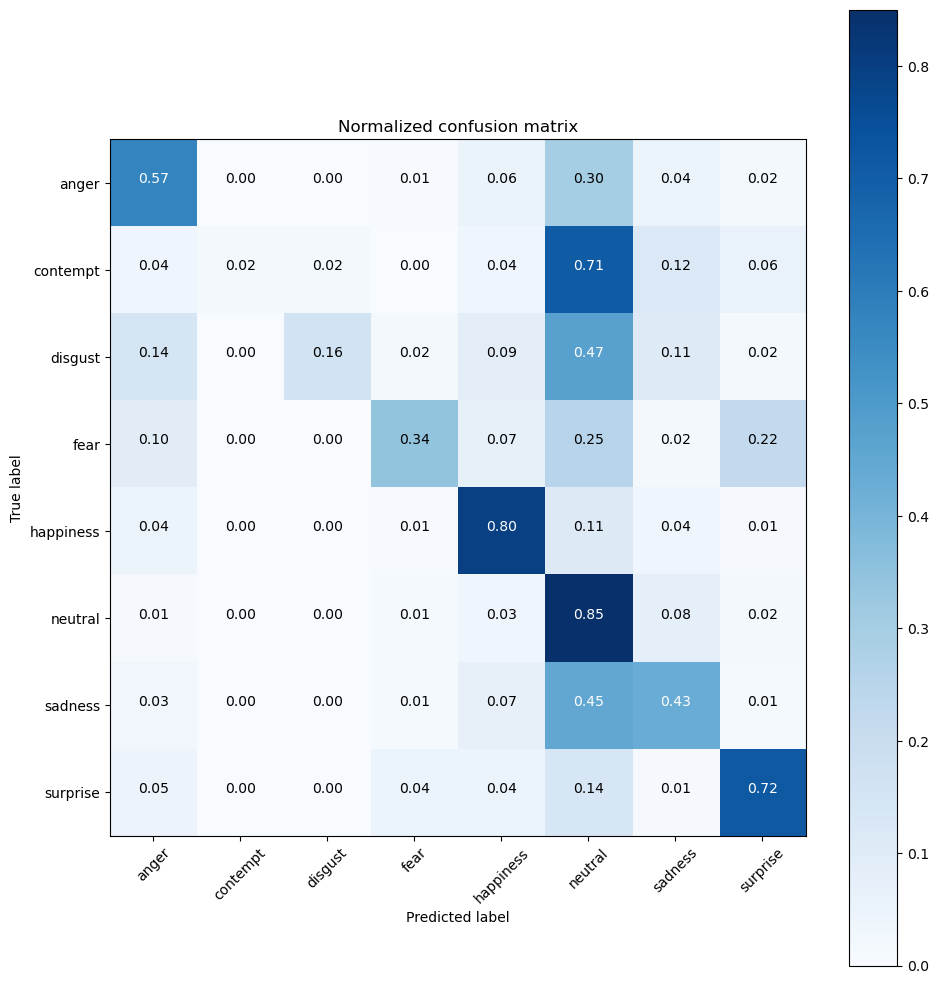

In [22]:
predictions = model.predict_generator(generator=test_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_set.classes
class_names = test_set.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

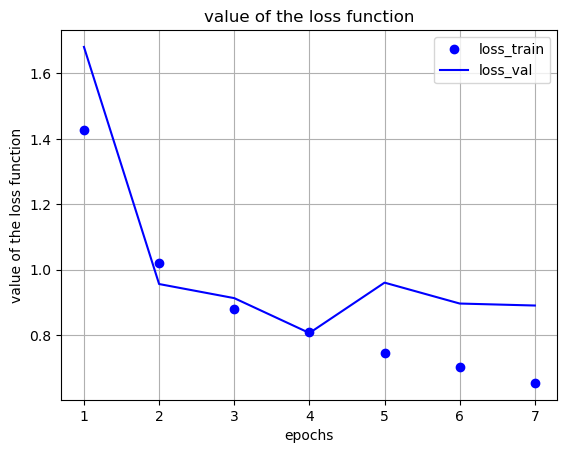

In [23]:
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()


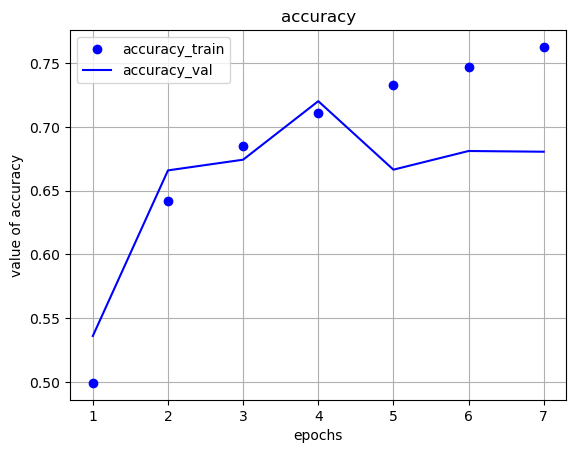

In [24]:
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()